In [1]:
from making_table_helper import *

In [2]:
pattern_to_gas_cost = get_pattern_to_gas_cost()
pattern_to_gas_cost

{1: {'deployment_transaction_before': '231938',
  'deployment_execution_before': '166408',
  'message_call_transaction_before': '27154',
  'message_call_execution_before': '6090',
  'deployment_transaction_after': '220290',
  'deployment_execution_after': '155602',
  'message_call_transaction_after': '26391',
  'message_call_execution_after': '5327'},
 2: {'deployment_transaction_before': '590280',
  'deployment_execution_before': '500672',
  'message_call_transaction_before': '30306',
  'message_call_execution_before': '7958',
  'deployment_transaction_after': '518438',
  'deployment_execution_after': '433810',
  'message_call_transaction_after': '30369',
  'message_call_execution_after': '8021'},
 3: {'deployment_transaction_before': '207710',
  'deployment_execution_before': '146106',
  'message_call_transaction_before': '34046',
  'message_call_execution_before': '12982',
  'deployment_transaction_after': '197484',
  'deployment_execution_after': '130506',
  'message_call_transacti

In [4]:
def get_meta_pattern_stats(meta_pattern_category):
    novel_patterns = [1,2,3,5,9,10,11,12,13,16,20,21,22]
    
    occurrence_count_percentage = dict()
    for k in meta_pattern_category:
        s = 0
        for category in meta_pattern_category[k]:
            s += pattern_to_occurrence_count_info[category]

        occurrence_count_percentage[k] = s / len(meta_pattern_category[k])
        
        
    


    contract_count_percentage = dict()
    for k in meta_pattern_category:
        s = 0
#         ss = list()
        for category in meta_pattern_category[k]:
            s += pattern_to_contract_count_info[category]
#             ss.extend(pattern_to_contract_count_info_just_contract_list[category])

        contract_count_percentage[k] = s / len(meta_pattern_category[k])



    # idea: percentage of the number of contracts that each meta-category were found at.
    # formula: if C1 was found at m1 contracts, and C2 was found at m2 contracts, etc, then it is m1 / (sum m_i) 
    # further: to ensure fairness, since the meta-categories have imbalanced counts, we use the average number of appearance within a category for m_i.
    # Overall, this measures the prevalence.
    
    # In addition, the following average_novelty_count measures the novelty of a certain meta-category, in terms of 
    #.   the percentage of newly discovered types of patterns that are under each meta-category.
    
    s = sum(contract_count_percentage.values())
    for k in contract_count_percentage:
        contract_count_percentage[k] = 100 * (contract_count_percentage[k] / s)
    
    
    
    average_deployment_gas_saving = dict()
    for k in meta_pattern_category:
        s = 0
        for category in meta_pattern_category[k]:
            after = int(pattern_to_gas_cost[category]['deployment_execution_after'])
            before = int(pattern_to_gas_cost[category]['deployment_execution_before'])
            s += ((before - after) / before ) * 100

        average_deployment_gas_saving[k] = s / len(meta_pattern_category[k])

    average_message_call_gas_saving = dict()
    for k in meta_pattern_category:
        s = 0
        for category in meta_pattern_category[k]:
            after = int(pattern_to_gas_cost[category]['message_call_execution_after'])
            before = int(pattern_to_gas_cost[category]['message_call_execution_before'])
            s += ((before - after) / before ) * 100

        average_message_call_gas_saving[k] = s / len(meta_pattern_category[k])
        
        
    average_gas = dict()
    for k in average_message_call_gas_saving:
        average_gas[k] = (average_message_call_gas_saving[k] + average_deployment_gas_saving[k]) / 2
    
    average_novelty_count = dict()
    for k in meta_pattern_category:
        s = 0
        for category in meta_pattern_category[k]:
            if category in novel_patterns:
                s += 1

        average_novelty_count[k] = s / len(meta_pattern_category[k])
        average_novelty_count[k] = (s / len(novel_patterns)) * 100
        

        
        
    return occurrence_count_percentage, contract_count_percentage, average_deployment_gas_saving, average_gas, average_novelty_count




In [6]:
# GETTING some stats for each pattern
pattern_to_occurrence_count_info = {i:[] for i in range(1,27)}
pattern_to_contract_count_info = {i:[] for i in range(1,27)}


cur_file_path = "./data_replication_package/evaluation_statistics/regular_results.txt"
full_table_text = read_from_file(cur_file_path)

data_entry_rows = [i for i in full_table_text.split('\n') if '&' in i]


for r in data_entry_rows:
    if r.strip() == '':
        continue
    items = [i.strip() for i in r.split('&') if i.strip()!='']
    print(items)
    assert len(items) == 3
    
    if not items[2].startswith('A'):
        cur_category = int(items[2])
        pattern_to_occurrence_count_info[cur_category].append(items)
        pattern_to_contract_count_info[cur_category].append(items[1])
        
        
cur_file_path = "./data_replication_package/evaluation_statistics/ablation_results.txt"
full_table_text = read_from_file(cur_file_path)

data_entry_rows = [i for i in full_table_text.split('\n') if '&' in i]


for r in data_entry_rows:
    if r.strip() == '':
        continue
    items = [i.strip() for i in r.split('&') if i.strip()!='']
    print(items)
    assert len(items) == 3
    
    if not items[2].startswith('A'):
        cur_category = int(items[2])
        pattern_to_occurrence_count_info[cur_category].append(items)
        pattern_to_contract_count_info[cur_category].append(items[1].split('.', 1)[1])
        

['Repeated Condition Check', '1.1', '9']
['Constant Function Hash Calculation', '1.2', '5']
['Redundant Success Check', '1.2', 'A3']
['Redundant Address Check', '1.3', 'A3']
['Repeated Calls to External Contracts', '1.3', 'A4']
['Redundant Memory Array Initialization', '1.3', '12']
['Repeated Check for Zero Addresses', '1.4', 'A4']
['Expensive Storage Operations', '1.4', 'A2']
['Usage of ‘require‘ for Input Validation', '1.4', '13']
['Repeated computation of ‘\\_msgSender()‘', '1.5', 'A4']
['Repeated computation of ‘\\_allowances[owner][spender]‘', '1.5', 'A4']
['Redundant Condition Check', '1.6', '8']
['Multiple Calls to the Same Function', '1.6', 'A4']
['Repeating Expensive Operations', '1.7', 'A4']
['Redundant Conditional Statement', '1.7', 'A6']
['Unnecessary State Updates', '1.7', '14']
['Redundant Condition Checks in transfer Function', '1.8', '7']
['Redundant Computation in openTrading Function', '1.8', '1']
['Inefficient Storage Reading', '1.9', 'A4']
['Redundant Ownership Chec

In [7]:
for i in pattern_to_occurrence_count_info:
    pattern_to_occurrence_count_info[i] = len(pattern_to_occurrence_count_info[i])
    

pattern_to_contract_count_info_just_contract_list = pattern_to_contract_count_info.copy()
s = 0
for i in pattern_to_contract_count_info:
    pattern_to_contract_count_info[i] = len(set(pattern_to_contract_count_info[i]))
    s += pattern_to_contract_count_info[i]

In [8]:
s

100

In [9]:
len(pattern_to_occurrence_count_info)

26

In [10]:
pattern_to_occurrence_count_info

{1: 74,
 2: 8,
 3: 13,
 4: 5,
 5: 2,
 6: 1,
 7: 5,
 8: 13,
 9: 3,
 10: 6,
 11: 5,
 12: 1,
 13: 1,
 14: 1,
 15: 2,
 16: 1,
 17: 1,
 18: 5,
 19: 1,
 20: 2,
 21: 1,
 22: 1,
 23: 1,
 24: 2,
 25: 1,
 26: 1}

In [11]:
pattern_to_contract_count_info

{1: 31,
 2: 8,
 3: 12,
 4: 3,
 5: 2,
 6: 1,
 7: 4,
 8: 9,
 9: 3,
 10: 2,
 11: 3,
 12: 1,
 13: 1,
 14: 1,
 15: 2,
 16: 1,
 17: 1,
 18: 5,
 19: 1,
 20: 2,
 21: 1,
 22: 1,
 23: 1,
 24: 2,
 25: 1,
 26: 1}

#  Meta-categorization 1 (M1): By the type of required modification:

1. redundancy-related: which need deletion of certain code elements

2. code elements with better and straightforward alternatives (i.e., a simple replacement): which needs replacement of certain code elements (directly replace a certain element with something else)

3. order-dependent: which needs reordering lines of codes and making corresponding adjustments, if necessary (reorder the order of existing code elements, such as moving certain lines of codes to other lines)

4. any other category that require a combination of refactoring.







# Meta-categorization 2 (M2): By functionality: 

1. execution flow management
2. state and memory management
3. data structure and type
4. event handling and logging
5. arithmetic optimizations
6. security and correctness



# Meta-categorization 3 (M3): By syntax: 

1. modifier/decorator: involve simple one-word changes or minor syntax alterations that can impact gas usage.

2. single expression/statement: where a single line or expression can be optimized.

3. code block (>=2 statements): where optimizations occur across multiple lines or statements within a block of code.

4. functions: involve changes at the function-level, affecting how functions are declared or utilized.




In [17]:
# M1
meta_pattern_category = dict()
meta_pattern_category[1] = [1,4,9,10,11,14,19]
meta_pattern_category[2] = [3,5,6,7,8,12,17,18,20,21,22,26]
meta_pattern_category[3] = [13,15,23]
meta_pattern_category[4] = [2,16,24,25]



assert len(set(sum(meta_pattern_category.values(), []))) == 26

In [16]:
occurrence_count_percentage, contract_count_percentage, average_deployment_gas_saving, average_message_call_gas_saving, average_novelty_count = get_meta_pattern_stats(meta_pattern_category)
# print(f'occurrence_count_percentage: {occurrence_count_percentage}')
print(f'contract_count_percentage: {contract_count_percentage}')
print(f'average_deployment_gas_saving: {average_deployment_gas_saving}')
print(f'average_message_call_gas_saving: {average_message_call_gas_saving}')
print(f'average_novelty_count: {average_novelty_count}')

contract_count_percentage1 = contract_count_percentage
average_novelty_count1 = average_novelty_count

# note that meta 3 introduces no change to deployment costs, which makes sense since it just involves simple reordering of statements
# note that just taking the contract would be better
# note that the meta 3, reordering, is less novel.



contract_count_percentage: {1: 45.051194539249146, 2: 23.890784982935152, 3: 9.556313993174061, 4: 21.501706484641637}
average_deployment_gas_saving: {1: 6.065405511884559, 2: 16.7442604358755, 3: 0.0, 4: 7.626429317894455}
average_message_call_gas_saving: {1: 6.822485807001998, 2: 23.825191475226664, 3: 5.520304970890383, 4: 16.64907127254516}
average_novelty_count: {1: 30.76923076923077, 2: 46.15384615384615, 3: 7.6923076923076925, 4: 15.384615384615385}


In [18]:

# LaTeX table setup
contents = "\\begin{table}[H]\n\\centering\n"
contents += "\\begin{tabular}{|c|c|c|c|}\n\\hline\n"
contents += "Contract Type & Contract Count Percentage (\%) & Average Gas Saving & Average Novelty Count \\\\\\hline\n"

# Generating the rows of the table
for key in range(1,5):
    contract_type = key
    count_percent = round(contract_count_percentage.get(key, 0), 3)
    gas_saving = round(average_message_call_gas_saving.get(key, 0), 3)
    novelty_count = round(average_novelty_count.get(key, 0), 3)
    
    # Constructing the row
    row = f"{contract_type} & {count_percent} & {gas_saving} \% & {novelty_count} \\\\\\hline\n"
    contents += row

# Closing the table
contents += "\\end{tabular}\n"
contents += "\\caption{Summary of Contract Types}\n"
contents += "\\label{tab:contract_summary}\n"
contents += "\\end{table}\n"

# Print the LaTeX table
print(contents)

\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Contract Type & Contract Count Percentage (\%) & Average Gas Saving & Average Novelty Count \\\hline
1 & 45.051 & 6.822 \% & 30.769 \\\hline
2 & 23.891 & 23.825 \% & 46.154 \\\hline
3 & 9.556 & 5.52 \% & 7.692 \\\hline
4 & 21.502 & 16.649 \% & 15.385 \\\hline
\end{tabular}
\caption{Summary of Contract Types}
\label{tab:contract_summary}
\end{table}



In [20]:
# M2
meta_pattern_category = dict()
meta_pattern_category[1] = [1,2,4,9,10,13,18,19,24,25]
meta_pattern_category[2] = [3,12,14,17,23]
meta_pattern_category[3] = [8,26]
meta_pattern_category[4] = [16,21]
meta_pattern_category[5] = [5,6,7,15,22]
meta_pattern_category[6] = [11,20]


assert len(set(sum(meta_pattern_category.values(), []))) == 26

In [21]:
occurrence_count_percentage, contract_count_percentage, average_deployment_gas_saving, average_message_call_gas_saving, average_novelty_count = get_meta_pattern_stats(meta_pattern_category)
# print(f'occurrence_count_percentage: {occurrence_count_percentage}')
print(f'contract_count_percentage: {contract_count_percentage}')
print(f'average_deployment_gas_saving: {average_deployment_gas_saving}')
print(f'average_message_call_gas_saving: {average_message_call_gas_saving}')
print(f'average_novelty_count: {average_novelty_count}')

contract_count_percentage2 = contract_count_percentage
average_novelty_count2 = average_novelty_count


contract_count_percentage: {1: 29.381443298969074, 2: 16.494845360824744, 3: 25.773195876288664, 4: 5.154639175257732, 5: 10.309278350515465, 6: 12.886597938144332}
average_deployment_gas_saving: {1: 4.399858098861403, 2: 11.31265834548355, 3: 26.72657333208344, 4: 25.555517182772007, 5: 6.539780523313212, 6: 18.03486236148351}
average_message_call_gas_saving: {1: 12.989065687682867, 2: 19.674283966125515, 3: 21.493152894750544, 4: 32.05206568239818, 5: 9.30442250420109, 6: 17.47113598591329}
average_novelty_count: {1: 38.46153846153847, 2: 15.384615384615385, 3: 0.0, 4: 15.384615384615385, 5: 15.384615384615385, 6: 15.384615384615385}


In [23]:

# LaTeX table setup
contents = "\\begin{table}[H]\n\\centering\n"
contents += "\\begin{tabular}{|c|c|c|c|}\n\\hline\n"
contents += "Contract Type & Contract Count Percentage (\%) & Average Gas Saving & Average Novelty Count \\\\\\hline\n"

# Generating the rows of the table
for key in range(1,7):
    contract_type = key
    count_percent = round(contract_count_percentage.get(key, 0), 3)
    gas_saving = round(average_message_call_gas_saving.get(key, 0), 3)
    novelty_count = round(average_novelty_count.get(key, 0), 3)
    
    # Constructing the row
    row = f"{contract_type} & {count_percent} & {gas_saving} \% & {novelty_count} \\\\\\hline\n"
    contents += row

# Closing the table
contents += "\\end{tabular}\n"
contents += "\\caption{Summary of Contract Types}\n"
contents += "\\label{tab:contract_summary}\n"
contents += "\\end{table}\n"

# Print the LaTeX table
print(contents)

\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Contract Type & Contract Count Percentage (\%) & Average Gas Saving & Average Novelty Count \\\hline
1 & 29.381 & 12.989 \% & 38.462 \\\hline
2 & 16.495 & 19.674 \% & 15.385 \\\hline
3 & 25.773 & 21.493 \% & 0.0 \\\hline
4 & 5.155 & 32.052 \% & 15.385 \\\hline
5 & 10.309 & 9.304 \% & 15.385 \\\hline
6 & 12.887 & 17.471 \% & 15.385 \\\hline
\end{tabular}
\caption{Summary of Contract Types}
\label{tab:contract_summary}
\end{table}



In [24]:
# M3
meta_pattern_category = dict()
meta_pattern_category[1] = [3,11,17,18,20]
meta_pattern_category[2] = [5,6,7,12,14,15,21,22,26]
meta_pattern_category[3] = [1,4,8,10,13,16,19,23,24,25]
meta_pattern_category[4] = [2,9]


assert len(set(sum(meta_pattern_category.values(), []))) == 26

In [25]:
occurrence_count_percentage, contract_count_percentage, average_deployment_gas_saving, average_message_call_gas_saving, average_novelty_count = get_meta_pattern_stats(meta_pattern_category)
# print(f'occurrence_count_percentage: {occurrence_count_percentage}')
print(f'contract_count_percentage: {contract_count_percentage}')
print(f'average_deployment_gas_saving: {average_deployment_gas_saving}')
print(f'average_message_call_gas_saving: {average_message_call_gas_saving}')
print(f'average_novelty_count: {average_novelty_count}')

contract_count_percentage3 = contract_count_percentage
average_novelty_count3 = average_novelty_count

# note that meta 3 introduces no change to deployment costs, which makes sense since it just involves simple reordering of statements
# note that just taking the contract would be better
# note that the meta 3, reordering, is less novel.

# Discussion: one major limitation is that we don't have many data points, so randomness oculd exist


contract_count_percentage: {1: 27.290705339485825, 2: 9.22874093605801, 3: 30.850362557679635, 4: 32.630191166776534}
average_deployment_gas_saving: {1: 8.128871735739057, 2: 15.983777268129764, 3: 6.341494393506115, 4: 12.990691529175713}
average_message_call_gas_saving: {1: 24.40509523151662, 2: 18.079301473149712, 3: 11.868448784275783, 4: 6.696610547948676}
average_novelty_count: {1: 23.076923076923077, 2: 30.76923076923077, 3: 30.76923076923077, 4: 15.384615384615385}


In [26]:

# LaTeX table setup
contents = "\\begin{table}[H]\n\\centering\n"
contents += "\\begin{tabular}{|c|c|c|c|}\n\\hline\n"
contents += "Contract Type & Contract Count Percentage (\%) & Average Gas Saving & Average Novelty Count \\\\\\hline\n"

# Generating the rows of the table
for key in range(1,5):
    contract_type = key
    count_percent = round(contract_count_percentage.get(key, 0), 3)
    gas_saving = round(average_message_call_gas_saving.get(key, 0), 3)
    novelty_count = round(average_novelty_count.get(key, 0), 3)
    
    # Constructing the row
    row = f"{contract_type} & {count_percent} & {gas_saving} \% & {novelty_count} \\\\\\hline\n"
    contents += row

# Closing the table
contents += "\\end{tabular}\n"
contents += "\\caption{Summary of Contract Types}\n"
contents += "\\label{tab:contract_summary}\n"
contents += "\\end{table}\n"

# Print the LaTeX table
print(contents)

\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Contract Type & Contract Count Percentage (\%) & Average Gas Saving & Average Novelty Count \\\hline
1 & 27.291 & 24.405 \% & 23.077 \\\hline
2 & 9.229 & 18.079 \% & 30.769 \\\hline
3 & 30.85 & 11.868 \% & 30.769 \\\hline
4 & 32.63 & 6.697 \% & 15.385 \\\hline
\end{tabular}
\caption{Summary of Contract Types}
\label{tab:contract_summary}
\end{table}



In [28]:
average_novelty_count2

{1: 38.46153846153847,
 2: 15.384615384615385,
 3: 0.0,
 4: 15.384615384615385,
 5: 15.384615384615385,
 6: 15.384615384615385}

In [30]:
print(list((zip(contract_count_percentage2, average_novelty_count2))))

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]


In [32]:

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(*[max(0, min(255, x)) for x in rgb])

colors_rgb = [
    (231, 98, 84),       
    (247, 170, 88),    
    (255, 230, 183),
    (170, 220, 224),
    (82, 143, 173),
    (30, 70, 110),
]


In [33]:
rgb_to_hex(colors_rgb[0])

'#e76254'

1 45.051194539249146 1
2 23.890784982935152 2
3 9.556313993174061 3
4 21.501706484641637 4
1
2
3
4
1 29.381443298969074 1
2 16.494845360824744 2
3 25.773195876288664 3
4 5.154639175257732 4
5 10.309278350515465 5
6 12.886597938144332 6
1
2
3
4
5
6
1 27.290705339485825 1
2 9.22874093605801 2
3 30.850362557679635 3
4 32.630191166776534 4
1
2
3
4


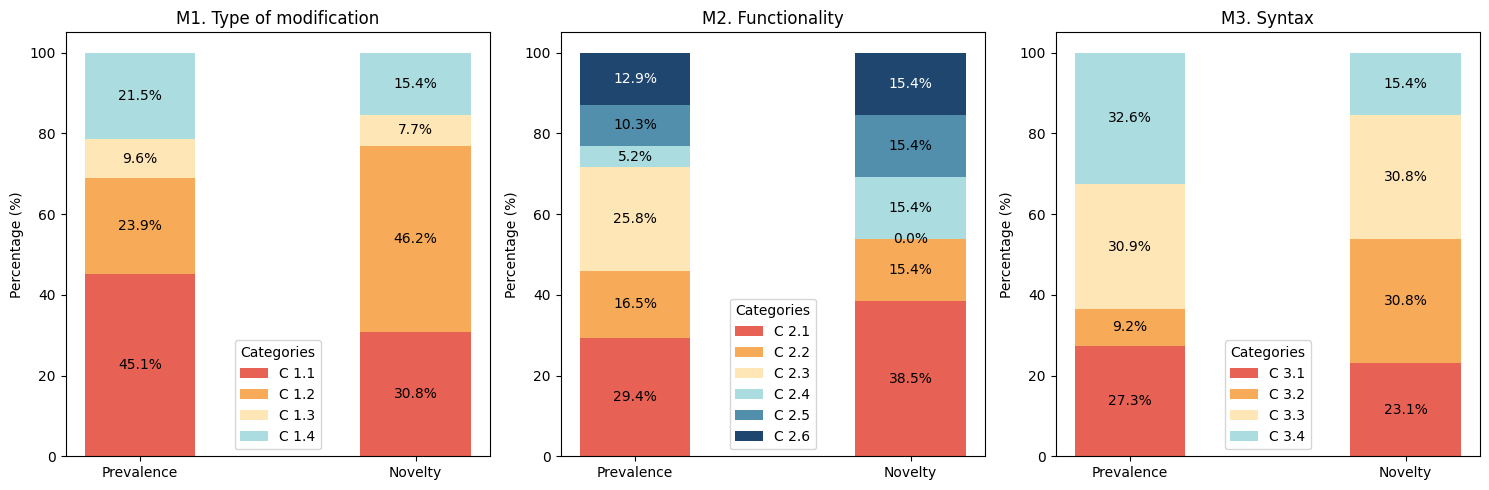

In [34]:
import matplotlib.pyplot as plt
import numpy as np

percentages1 = contract_count_percentage1
novelties1 = average_novelty_count1
percentages2 = contract_count_percentage2
novelties2 = average_novelty_count2
percentages3 = contract_count_percentage3
novelties3 = average_novelty_count3

def normalize(data):
    return data

# Normalize each list
percentages1_norm = normalize(percentages1)
novelties1_norm = normalize(novelties1)
percentages2_norm = normalize(percentages2)
novelties2_norm = normalize(novelties2)
percentages3_norm = normalize(percentages3)
novelties3_norm = normalize(novelties3)





def plot_stacked_bar(ax, percentages, novelties, title, group_num):
    categories = list(range(1,len(percentages) + 1))
    x = np.arange(2)  # one for percentages, one for novelties

    colors = [rgb_to_hex(c) for c in colors_rgb]

    hatches = [''] * 6
    
    text_colors = ['black'] * 5 + ['white']
    
    
    # stacked bar for percentages
    bottoms = 0
    for i in categories:
        label = i
        p = percentages[i]
        print(i, p, label)
        ax.bar(x[0], p, bottom=bottoms, width=0.4, color=colors[i-1], label=f'C {group_num}.{label}', hatch = hatches[i-1])
        
        center = bottoms + p / 2
        ax.text(x[0], center, f'{p:.1f}%', ha='center', va='center', color=text_colors[i-1])
        
        
        bottoms += p

    # stacked bar for novelties
    bottoms = 0
    
    for i in categories:
        print(i)
        n = novelties[i]
        ax.bar(x[1], n, bottom=bottoms, width=0.4, color=colors[i-1], hatch = hatches[i-1])
        
        center = bottoms + n / 2        
        ax.text(x[1], center, f'{n:.1f}%', ha='center', va='center', color=text_colors[i-1])
        
        bottoms += n

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(['Prevalence', 'Novelty'])
    ax.set_ylabel('Percentage (%)')
    ax.legend(title="Categories")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_stacked_bar(axes[0], percentages1_norm, novelties1_norm, 'M1. Type of modification', '1')
plot_stacked_bar(axes[1], percentages2_norm, novelties2_norm, 'M2. Functionality', '2')
plot_stacked_bar(axes[2], percentages3_norm, novelties3_norm, 'M3. Syntax', '3')




fig.tight_layout()


plt.savefig('meta_category.png', format='png', dpi=300, bbox_inches='tight')


plt.show()